In [47]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

From the data exploratory exercise, we identified that loan purpose appears to have influence on the loans being paid off or not. To prove that the influence is statistically significant, we will run chi square test on it

In [2]:
lend = pd.read_csv('data/lending_clean.csv')
lend_2009on = lend[lend['loan_start_d'] >= '2009-01-01']

Null Hypothesis - different loan purposes do not affect loan paid off rate

Alternative Hypothesis - loan purposes affect paid off rate

In [26]:
table = pd.crosstab(lend_2009on['purpose'], lend_2009on['target'])
table['paid_off_rate'] = table[1]/(table[1] + table[0])*100
print(table['paid_off_rate'].sort_values(ascending=False))

purpose
car                   89.857881
major_purchase        89.683258
wedding               89.552239
credit_card           89.200561
home_improvement      87.462785
vacation              84.816754
debt_consolidation    84.784596
house                 83.673469
other                 83.564057
moving                83.361921
medical               83.261183
educational           81.395349
renewable_energy      80.582524
small_business        73.300166
Name: paid_off_rate, dtype: float64


In [28]:
stat, p, dof, expected = stats.chi2_contingency(table[[0,1]])
print ('chi_statistic: {:.3f}'.format(stat))
print ('p-value: {:.2f}'.format(p))
print ('degree of freedom: {:.0f}'.format(dof))
# print ('expected freq: {}'.format(expected))

chi_statistic: 378.179
p-value: 0.00
degree of freedom: 13


In [5]:
# interpret p-value, using 95% confident level
prob = 0.95
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


Conclude that loan_purpose has impact on the loan paid off rates

Additionally, the following attributes will be test as well per exploratory analysis

- Credit history
- DTI
- Number of credit lines 

In [29]:
# write a function to streamline the testing steps
def chi_square(data):
    table = pd.crosstab(lend_2009on[data], lend_2009on['target'])
    table['paid_off_rate'] = table[1]/(table[1] + table[0])*100
    stat, p, dof, expected = stats.chi2_contingency(table[[0,1]])
    print ('chi_statistic: {:.3f}'.format(stat))
    print ('p-value: {:.2f}'.format(p))
    print ('degree of freedom: {:.0f}'.format(dof))
    prob = 0.95
    alpha = 1.0 - prob
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

In [30]:
# Credit history
chi_square('yr_credit')

chi_statistic: 112.650
p-value: 0.00
degree of freedom: 52
Dependent (reject H0)


In [53]:
yr_credit_chi = pd.crosstab(lend_2009on['yr_credit'], lend_2009on['target'])

In [70]:
bins = range(0, 100, 10)
yr_credit_table = lend_2009on.copy()
yr_credit_table['binned'] = pd.cut(yr_credit_table['yr_credit'], bins=bins)

In [77]:
table_cre = pd.crosstab(yr_credit_table['binned'], yr_credit_table['target'])
table_cre['paid_off'] = table_cre[1]/(table_cre[0]+table_cre[1])*100

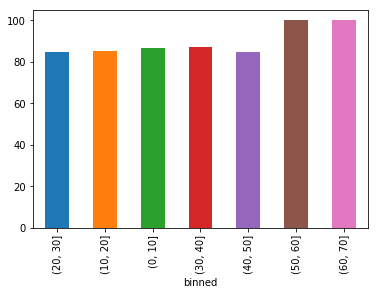

In [82]:
table_cre['paid_off'].plot(kind='bar')

In [32]:
# DTI
chi_square('dti')

chi_statistic: 2886.172
p-value: 0.39
degree of freedom: 2866
Independent (fail to reject H0)


In [33]:
# number of credit line
chi_square('total_acc')

chi_statistic: 150.631
p-value: 0.00
degree of freedom: 80
Dependent (reject H0)


Conclude that credit history and number of credit line have impact on the loan paid off rates, while DTI does not